## Problem Set 4
### MACS 30200
### Leoson Hoay

**Importing necessary packages**:

In [1]:
import numpy as np
import scipy.stats as sts
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### Problem 1

**(a)**

In [2]:
r = 0.85
mu = 11.4
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [3]:
z = np.zeros(500)

In [4]:
for i in range(500):
    if i == 0:
        z[i] = r*unif_vec[0] + (1-r)*mu + eps_vec[i]
    else:
        z[i] = r*z[i-1] + (1-r)*mu + eps_vec[i]

In [5]:
z

array([ 3.23849021,  4.60812198,  5.2164978 ,  5.51887776,  6.24374493,
        6.18543692,  7.30476859,  7.80913311,  8.44675432,  8.65202383,
        8.89116037,  8.42012593,  8.77389048,  9.31889733,  8.94063031,
        9.34590613,  9.33842967, 10.01310826,  9.98214958, 10.88059339,
       10.92575602, 11.02585647, 10.8737385 , 12.92131757, 12.71811919,
       12.62439986, 11.16738531, 11.61012107, 11.43907413, 11.32209193,
       10.92932058, 11.89810392, 12.13057829, 11.94375158, 11.47441936,
       11.50859111, 11.59663594, 12.02894585, 12.59795921, 13.06894091,
       11.8213986 , 12.01822875, 11.57692535, 11.59296933, 12.77429957,
       13.4019536 , 12.72535125, 12.54826745, 11.43187522, 11.68122987,
       10.85853018, 11.44887645, 10.44241322, 10.28012835, 10.77520778,
       10.88509369, 11.24180585, 11.44672244, 11.84573871, 11.62898043,
       11.4110171 , 12.06395449, 12.35695971, 11.3080389 , 12.02417885,
       11.82633057, 11.53746676, 12.47146708, 12.39478164, 11.77

<IPython.core.display.Javascript object>


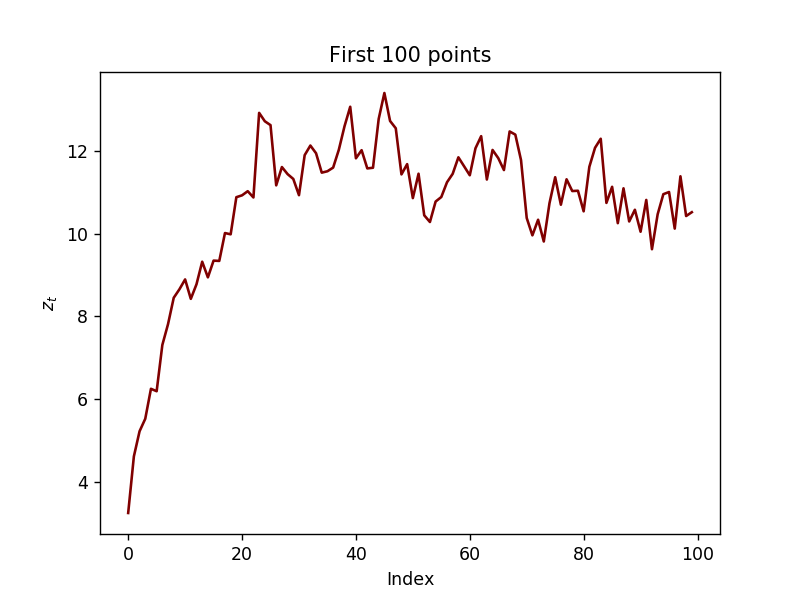

In [21]:
%matplotlib notebook
plt.plot(z[:100], color = "maroon")
plt.title("First 100 points")
plt.xlabel("Index")
plt.ylabel("$z_t$")
plt.show()

**(b)**

In [7]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)

In [8]:
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

**(c)**

In [9]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [10]:
transition_mat = np.zeros(shape=(5,5))

In [11]:
z_indices = np.digitize(z,z_cuts)

In [12]:
for j in range(499):
    transition_mat[z_indices[j]][z_indices[j+1]] += 1

In [13]:
transition_mat = transition_mat/transition_mat.sum(axis = 1, keepdims=True)
transition_mat

array([[0.75757576, 0.21212121, 0.03030303, 0.        , 0.        ],
       [0.1       , 0.50909091, 0.34545455, 0.04545455, 0.        ],
       [0.03144654, 0.22012579, 0.48427673, 0.2327044 , 0.03144654],
       [0.        , 0.04273504, 0.34188034, 0.5042735 , 0.11111111],
       [0.        , 0.        , 0.04255319, 0.34042553, 0.61702128]])

**(d)**

In [14]:
initial_vec =  np.array([[0], [0],[1],[0],[0]])

In [15]:
transition_mat_cubed = LA.matrix_power(transition_mat.T,3) 

In [16]:
transition_mat_cubed @ initial_vec

array([[0.08212922],
       [0.2298291 ],
       [0.3614678 ],
       [0.24905013],
       [0.07752374]])

The probability is approximately 0.0775.

**(e)**

In [17]:
eigvals, eigvecmat = LA.eig(transition_mat.T)
eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec

In [18]:
print(stat_dist)

[0.13226453 0.22044088 0.31863727 0.23446894 0.09418838]


The above represents the long run ergodic distribution of $z_t$.

**(f)**

In [19]:
z0 = z_vals[2]
x_vec = np.zeros(T)
x_t = z0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(transition_mat[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    x_t = x_tp1
    xt_ind = xtp1_ind

<IPython.core.display.Javascript object>


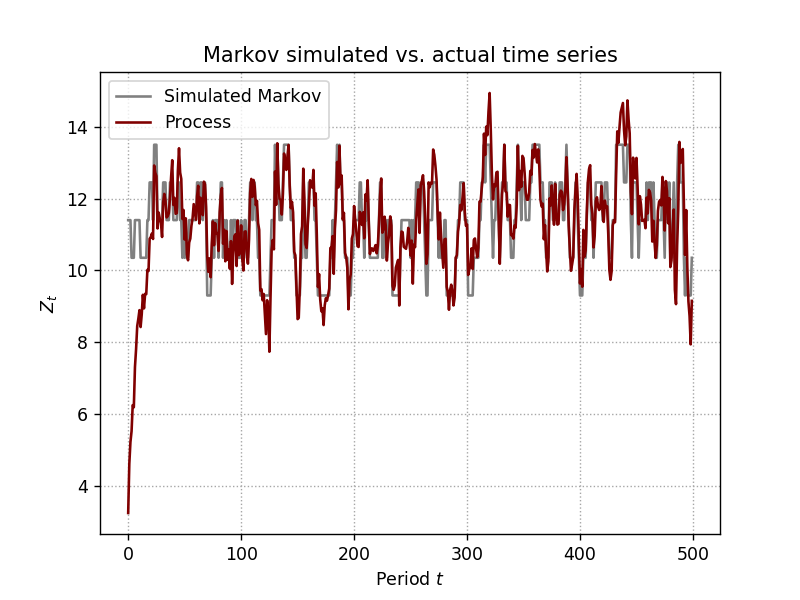

In [20]:
%matplotlib notebook
plt.plot(x_vec, color = "grey")
plt.plot(z, color = "maroon")
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Markov simulated vs. actual time series')
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Simulated Markov', 'Process'])